In [3]:
# Dependencies

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

#import weather API key
from weather_google_apis import weather_key

# Incorporated citipy to determine city based on latitude and longitude
!pip install citipy
from citipy import citipy

# Output File (CSV)
output_data_file = "cities-copy.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

city_data = pd.read_csv(output_data_file)
city_data.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

In [3]:
response = []
cities
type(cities[1])


str

In [4]:
print(f"Begining Data Retrieval")
print(f"-----------------------------")

for x in range(len(cities)):
    name = enumerate(cities)
    print(f"Processing Record: {x + 1} of Set 1 | {cities[x]}")
    response.append(x)
    
print(f"-----------------------------")
print(f"Data Retrieval Complete")
print(f"-----------------------------")



Begining Data Retrieval
-----------------------------
Processing Record: 1 of Set 1 | castro
Processing Record: 2 of Set 1 | nizhneyansk
Processing Record: 3 of Set 1 | camacha
Processing Record: 4 of Set 1 | pisco
Processing Record: 5 of Set 1 | bethel
Processing Record: 6 of Set 1 | port lincoln
Processing Record: 7 of Set 1 | severo-kurilsk
Processing Record: 8 of Set 1 | san patricio
Processing Record: 9 of Set 1 | turukhansk
Processing Record: 10 of Set 1 | ukhta
Processing Record: 11 of Set 1 | atuona
Processing Record: 12 of Set 1 | ushuaia
Processing Record: 13 of Set 1 | new norfolk
Processing Record: 14 of Set 1 | busselton
Processing Record: 15 of Set 1 | japura
Processing Record: 16 of Set 1 | thinadhoo
Processing Record: 17 of Set 1 | tsihombe
Processing Record: 18 of Set 1 | ancud
Processing Record: 19 of Set 1 | taolanaro
Processing Record: 20 of Set 1 | kodiak
Processing Record: 21 of Set 1 | barrow
Processing Record: 22 of Set 1 | pedernales
Processing Record: 23 of Se

In [5]:
ordered_city_data = city_data[["City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"]]
ordered_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ostrovnoy,68.05,39.51,37.50,72,2,7.16,RU,1558378754
1,mahebourg,-20.41,57.70,78.80,74,75,11.41,MU,1558378503
2,qaanaaq,77.48,-69.36,22.20,73,25,2.37,GL,1558378755
3,zhuhai,40.71,112.04,44.60,39,0,4.47,CN,1558378755
4,cape town,-33.93,18.42,55.99,76,20,8.05,ZA,1558378755


In [6]:
ordered_city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,5.480000e+02
mean,19.665146,20.675529,64.970785,67.671533,49.405109,8.672682,1.558379e+09
std,33.623560,90.307948,18.704318,23.697626,36.914201,5.865974,7.820486e+01
min,-54.810000,-173.230000,4.920000,4.000000,0.000000,0.540000,1.558378e+09
25%,-6.267500,-61.015000,53.970000,52.000000,13.750000,4.680000,1.558379e+09
50%,21.390000,21.240000,64.990000,71.000000,46.500000,7.010000,1.558379e+09
75%,47.887500,102.937500,80.600000,86.000000,81.000000,11.410000,1.558379e+09
max,78.220000,179.320000,104.100000,290.000000,100.000000,46.080000,1.558379e+09


In [7]:
df = ordered_city_data[ordered_city_data["Humidity"] < 100]
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ostrovnoy,68.05,39.51,37.50,72,2,7.16,RU,1558378754
1,mahebourg,-20.41,57.70,78.80,74,75,11.41,MU,1558378503
2,qaanaaq,77.48,-69.36,22.20,73,25,2.37,GL,1558378755
3,zhuhai,40.71,112.04,44.60,39,0,4.47,CN,1558378755
4,cape town,-33.93,18.42,55.99,76,20,8.05,ZA,1558378755


In [8]:
##write csv

df.to_csv("weatherpy.csv")

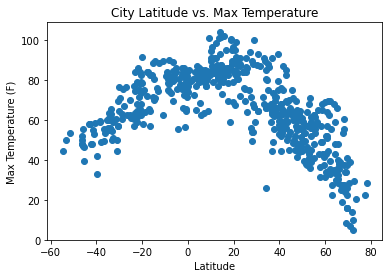

In [9]:
#Latitude (x) and Max Temp (y)

plt.scatter(df["Lat"], df["Max Temp"])
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

In [10]:
# Analysis: The code is analyzing the latitude of each city and comparing that respective city's max temperature.
# The code then plots the latitude on the x-axis and max temperature on the y-axis. 

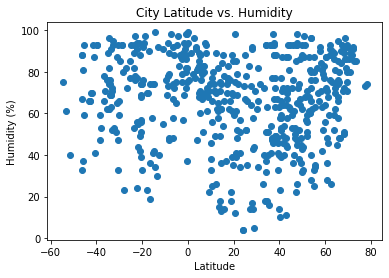

In [11]:
#Humidity (x) and Latitude (y)

plt.scatter(df["Lat"], df["Humidity"])
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

In [12]:
# Analysis: The code is analyzing the latitude of each city and comparing that respective city's humidity.
# The code then plots the latitude on the x-axis and humidity on the y-axis. 

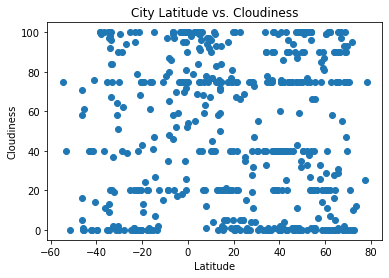

In [13]:
#Cloudiness (x) and Latitude (y)

plt.scatter(df["Lat"], df["Cloudiness"])
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

In [14]:
# Analysis: The code is analyzing the latitude of each city and comparing that respective city's cloudiness.
# The code then plots the latitude on the x-axis and cloudiness on the y-axis. 

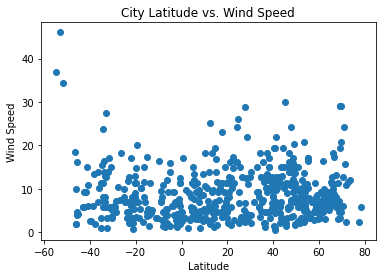

In [15]:
#Latitude (x) and Windspeed (y)

plt.scatter(df["Lat"], df["Wind Speed"])
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

In [16]:
# Analysis: The code is analyzing the latitude of each city and comparing that respective city's wind speed.
# The code then plots the latitude on the x-axis and wind speed on the y-axis. 

In [17]:
nh_df = df[df["Lat"] >= 0]
nh_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ostrovnoy,68.05,39.51,37.50,72,2,7.16,RU,1558378754
2,qaanaaq,77.48,-69.36,22.20,73,25,2.37,GL,1558378755
3,zhuhai,40.71,112.04,44.60,39,0,4.47,CN,1558378755
8,tiksi,71.64,128.87,14.10,88,95,15.70,RU,1558378756
9,pushkinskiye gory,57.02,28.91,65.04,70,6,6.93,RU,1558378756
...,...,...,...,...,...,...,...,...,...
543,yabrud,33.97,36.66,80.60,32,0,8.05,SY,1558378840
544,paraiso,24.01,-104.61,84.20,4,5,16.11,MX,1558378898
545,veraval,49.65,0.71,61.00,62,0,8.05,FR,1558378898
546,novyy urgal,51.07,132.56,49.74,93,100,2.68,RU,1558378899


In [18]:
sh_df = df[df["Lat"] < 0]
sh_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,mahebourg,-20.41,57.70,78.80,74,75,11.41,MU,1558378503
4,cape town,-33.93,18.42,55.99,76,20,8.05,ZA,1558378755
5,atuona,-9.80,-139.03,81.96,76,78,16.49,PF,1558378755
6,flinders,-34.58,150.85,60.01,62,0,11.41,AU,1558378755
7,opuwo,-18.06,13.84,72.06,23,0,5.44,NaN,1558378523
...,...,...,...,...,...,...,...,...,...
526,viedma,-40.81,-62.99,58.56,41,14,10.98,AR,1558378894
531,russell,-33.01,-68.80,50.00,71,75,12.75,AR,1558378895
536,padang,-0.92,100.36,81.24,82,100,7.65,ID,1558378896
539,palu,-0.90,119.87,78.72,80,72,3.83,ID,1558378897


In [19]:
#correlation variables
latnh = nh_df.iloc[:,1]
latsh = sh_df.iloc[:,1]
tempnh = nh_df.iloc[:,3]
tempsh = sh_df.iloc[:,3]
humnh = nh_df.iloc[:,4]
humsh = sh_df.iloc[:,4]
cloudnh = nh_df.iloc[:,5]
cloudsh = sh_df.iloc[:,5]
windnh = nh_df.iloc[:,6]
windsh = sh_df.iloc[:,6]

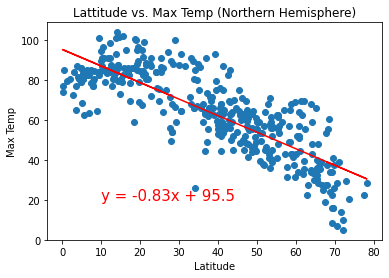

LinregressResult(slope=-0.830979396134797, intercept=95.50145791959072, rvalue=-0.8175518017556431, pvalue=6.026459252371531e-91, stderr=0.030387936422013227, intercept_stderr=1.3162583387098719)

In [20]:
# Add the linear regression equation and line to plot
x_values = nh_df["Lat"]
y_values = nh_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nh_df["Lat"], nh_df["Max Temp"])
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10, 20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Lattitude vs. Max Temp (Northern Hemisphere)")
plt.savefig("Lat vs. Temp NH.png")
plt.show()
linregress (latnh, tempnh)

In [21]:
# Analysis: The scatterplot above shows that the relationship between latitude and max temperature for each NH city. 
# Since the rvalue is -0.8175518017556431, there is a strong correlation between the two variables. 

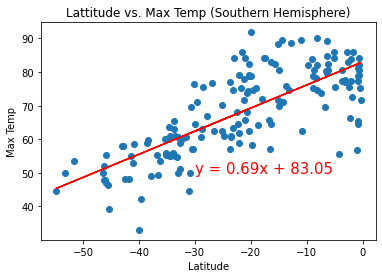

LinregressResult(slope=0.6878441433150122, intercept=83.054845119519, rvalue=0.7609446594671957, pvalue=4.6370121306605896e-32, stderr=0.04622172096737137, intercept_stderr=1.2097617202935829)

In [22]:
# Add the linear regression equation and line to plot
x_values = sh_df["Lat"]
y_values = sh_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(sh_df["Lat"], sh_df["Max Temp"])
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30, 50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Lattitude vs. Max Temp (Southern Hemisphere)")
plt.savefig("Lat vs. Temp SH.png")
plt.show()
linregress (latsh, tempsh)

In [23]:
# Analysis: The scatterplot above shows that the relationship between latitude and max temperature for each SH city. 
# Since the rvalue is 0.7609446594671957, there is a moderate correlation between the two variables. 

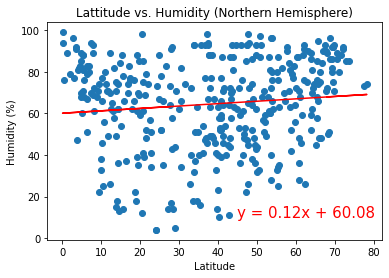

LinregressResult(slope=0.11517848742722404, intercept=60.08099406221946, rvalue=0.10750054449157322, pvalue=0.037965305303090294, stderr=0.05530312928796583, intercept_stderr=2.3954639127553023)

In [24]:
# Add the linear regression equation and line to plot
x_values = nh_df["Lat"]
y_values = nh_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nh_df["Lat"], nh_df["Humidity"])
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45, 10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Lattitude vs. Humidity (Northern Hemisphere)")
plt.savefig("Lat vs. Humidity NH.png")
plt.show()
linregress (latnh, humnh)

In [25]:
# Analysis: The scatterplot above shows that the relationship between latitude and humidity for each NH city. 
# Since the rvalue is 0.10750054449157322, there is no correlation between the two variables. 

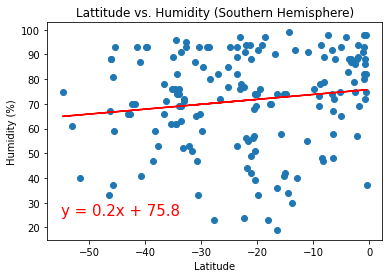

LinregressResult(slope=0.1981165773681487, intercept=75.80088105693743, rvalue=0.14515990219851058, pvalue=0.06448383867561233, stderr=0.10642329979884724, intercept_stderr=2.7854184472027237)

In [26]:
# Add the linear regression equation and line to plot
x_values = sh_df["Lat"]
y_values = sh_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(sh_df["Lat"], sh_df["Humidity"])
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55, 25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Lattitude vs. Humidity (Southern Hemisphere)")
plt.savefig("Lat vs. Humidity SH.png")
plt.show()
linregress (latsh, humsh)

In [27]:
# Analysis: The scatterplot above shows that the relationship between latitude and humidity for each SH city. 
# Since the rvalue is 0.14515990219851058, there is no correlation between the two variables. 

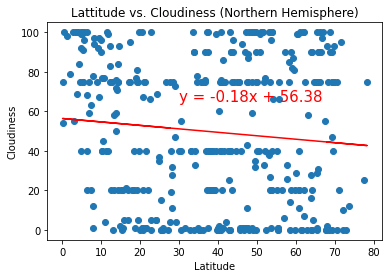

LinregressResult(slope=-0.1750086520076053, intercept=56.37959163033018, rvalue=-0.09783889725714878, pvalue=0.059056546689636454, stderr=0.09242136361543823, intercept_stderr=4.003246184417885)

In [28]:
# Add the linear regression equation and line to plot
x_values = nh_df["Lat"]
y_values = nh_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nh_df["Lat"], nh_df["Cloudiness"])
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30, 65),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Lattitude vs. Cloudiness (Northern Hemisphere)")
plt.savefig("Lat vs. Cloudiness NH.png")
plt.show()
linregress (latnh, cloudnh)

In [29]:
# Analysis: The scatterplot above shows that the relationship between latitude and cloudiness for each NH city. 
# Since the rvalue is -0.09783889725714878, there is no correlation between the two variables. 

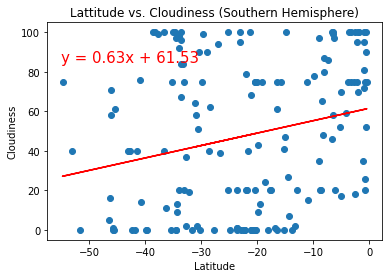

LinregressResult(slope=0.6275482742143635, intercept=61.532912446453096, rvalue=0.23675659380941125, pvalue=0.002343685855447787, stderr=0.20295780911960878, intercept_stderr=5.312017449131295)

In [30]:
# Add the linear regression equation and line to plot
x_values = sh_df["Lat"]
y_values = sh_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(sh_df["Lat"], sh_df["Cloudiness"])
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55, 85),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Lattitude vs. Cloudiness (Southern Hemisphere)")
plt.savefig("Lat vs. Cloudiness SH.png")
plt.show()
linregress (latsh, cloudsh)

In [31]:
# Analysis: The scatterplot above shows that the relationship between latitude and cloudiness for each SH city. 
# Since the rvalue is 0.23675659380941125, there is no correlation between the two variables. 

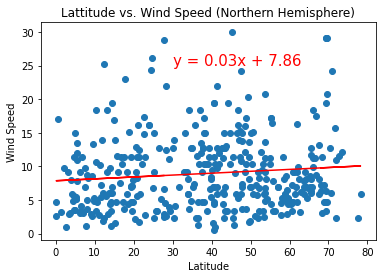

LinregressResult(slope=0.028166745786315162, intercept=7.859039491273401, rvalue=0.10315316791581258, pvalue=0.04649786621615296, stderr=0.014100814415346424, intercept_stderr=0.6107790374128491)

In [32]:
# Add the linear regression equation and line to plot
x_values = nh_df["Lat"]
y_values = nh_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nh_df["Lat"], nh_df["Wind Speed"])
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30, 25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Lattitude vs. Wind Speed (Northern Hemisphere)")
plt.savefig("Lat vs. Wind NH.png")
plt.show()
linregress (latnh, windnh)

In [33]:
# Analysis: The scatterplot above shows that the relationship between latitude and wind speed for each NH city. 
# Since the rvalue is 0.10315316791581258, there is no correlation between the two variables. 

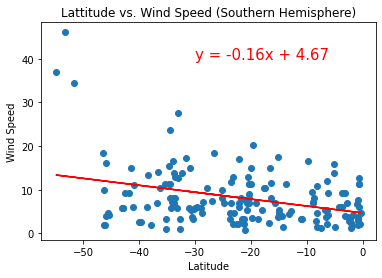

LinregressResult(slope=-0.15860979033003453, intercept=4.666727568331705, rvalue=-0.34512505858602577, pvalue=6.4290473845417205e-06, stderr=0.033993906659855126, intercept_stderr=0.8897229730878315)

In [34]:
# Add the linear regression equation and line to plot
x_values = sh_df["Lat"]
y_values = sh_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#check above line if you run into an error ^
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(sh_df["Lat"], sh_df["Wind Speed"])
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30, 40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Lattitude vs. Wind Speed (Southern Hemisphere)")
plt.savefig("Lat vs. Wind SH.png")
plt.show()
linregress (latsh, windsh)

In [35]:
# Analysis: The scatterplot above shows that the relationship between latitude and wind speed for each SH city. 
# Since the rvalue is -0.34512505858602577, there is weak correlation between the two variables. 